<a href="https://colab.research.google.com/github/RafsanJany-44/Research-NREM-REM/blob/main/Feature_Selection_F4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/krishnaik06/Feature-Selection-techniques/blob/master/Feature%20Selection.ipynb

https://www.youtube.com/watch?v=EqLBAmtKMnQ

In [45]:
Section="F4"

In [46]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
dataset = 'https://raw.githubusercontent.com/RafsanJany-44/Research-NREM-REM/main/dataset/F4_C4/REM_NREM_'+Section+'.csv'
data = pd.read_csv(dataset)
X = data.iloc[:,1:] #independent columns
y = data[['Sleep_Stage']]   #target column 

In [47]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k="all")
fit = bestfeatures.fit(X,y)

In [48]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [49]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [50]:
featureScores

,Specs,Score
0,MeanP_Alpha_F4,3.045533
1,MedianF_Alpha_F4,54.860001
2,MeanF_Alpha_F4,1444.310230
3,Spectral Edge_Alpha_F4,1063.080293
4,PeakF_Alpha_F4,989.711468
5,MeanP_Beta_F4,2.016815
6,MedianF_Beta_F4,1901.689469
7,MeanF_Beta_F4,326.889481
8,Spectral Edge_Beta_F4,808.041290
9,PeakF_Beta_F4,5974.560792


In [51]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                     Specs        Score
9            PeakF_Beta_F4  5974.560792
6          MedianF_Beta_F4  1901.689469
2           MeanF_Alpha_F4  1444.310230
3   Spectral Edge_Alpha_F4  1063.080293
4           PeakF_Alpha_F4   989.711468
23  Spectral Edge_Gamma_F4   810.752567
8    Spectral Edge_Beta_F4   808.041290
22          MeanF_Gamma_F4   736.238414
19          PeakF_Delta_F4   645.529310
21        MedianF_Gamma_F4   412.540933


In [52]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(featureScores.nlargest(10,'Score'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


                     Specs        Score
9            PeakF_Beta_F4  5974.560792
6          MedianF_Beta_F4  1901.689469
2           MeanF_Alpha_F4  1444.310230
3   Spectral Edge_Alpha_F4  1063.080293
4           PeakF_Alpha_F4   989.711468
23  Spectral Edge_Gamma_F4   810.752567
8    Spectral Edge_Beta_F4   808.041290
22          MeanF_Gamma_F4   736.238414
19          PeakF_Delta_F4   645.529310
21        MedianF_Gamma_F4   412.540933


In [53]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.04066818 0.03818493 0.06488851 0.05075463 0.03367387 0.0404925
 0.06294574 0.04016473 0.04315887 0.03658118 0.03761142 0.03218061
 0.03968998 0.03872622 0.02714611 0.03381406 0.03209565 0.04396146
 0.04589442 0.03461604 0.03733639 0.04164657 0.0441436  0.03738262
 0.02224172]


In [54]:
#plot graph of feature importances for better visualization
#feat_importances = pd.Series(model.feature_importances_, index=X.columns)
#feat_importances.nlargest(10).plot(figsize=(20,10),kind="bar")
#plt.show()
#print(featureScores.nlargest(10,'Score'))

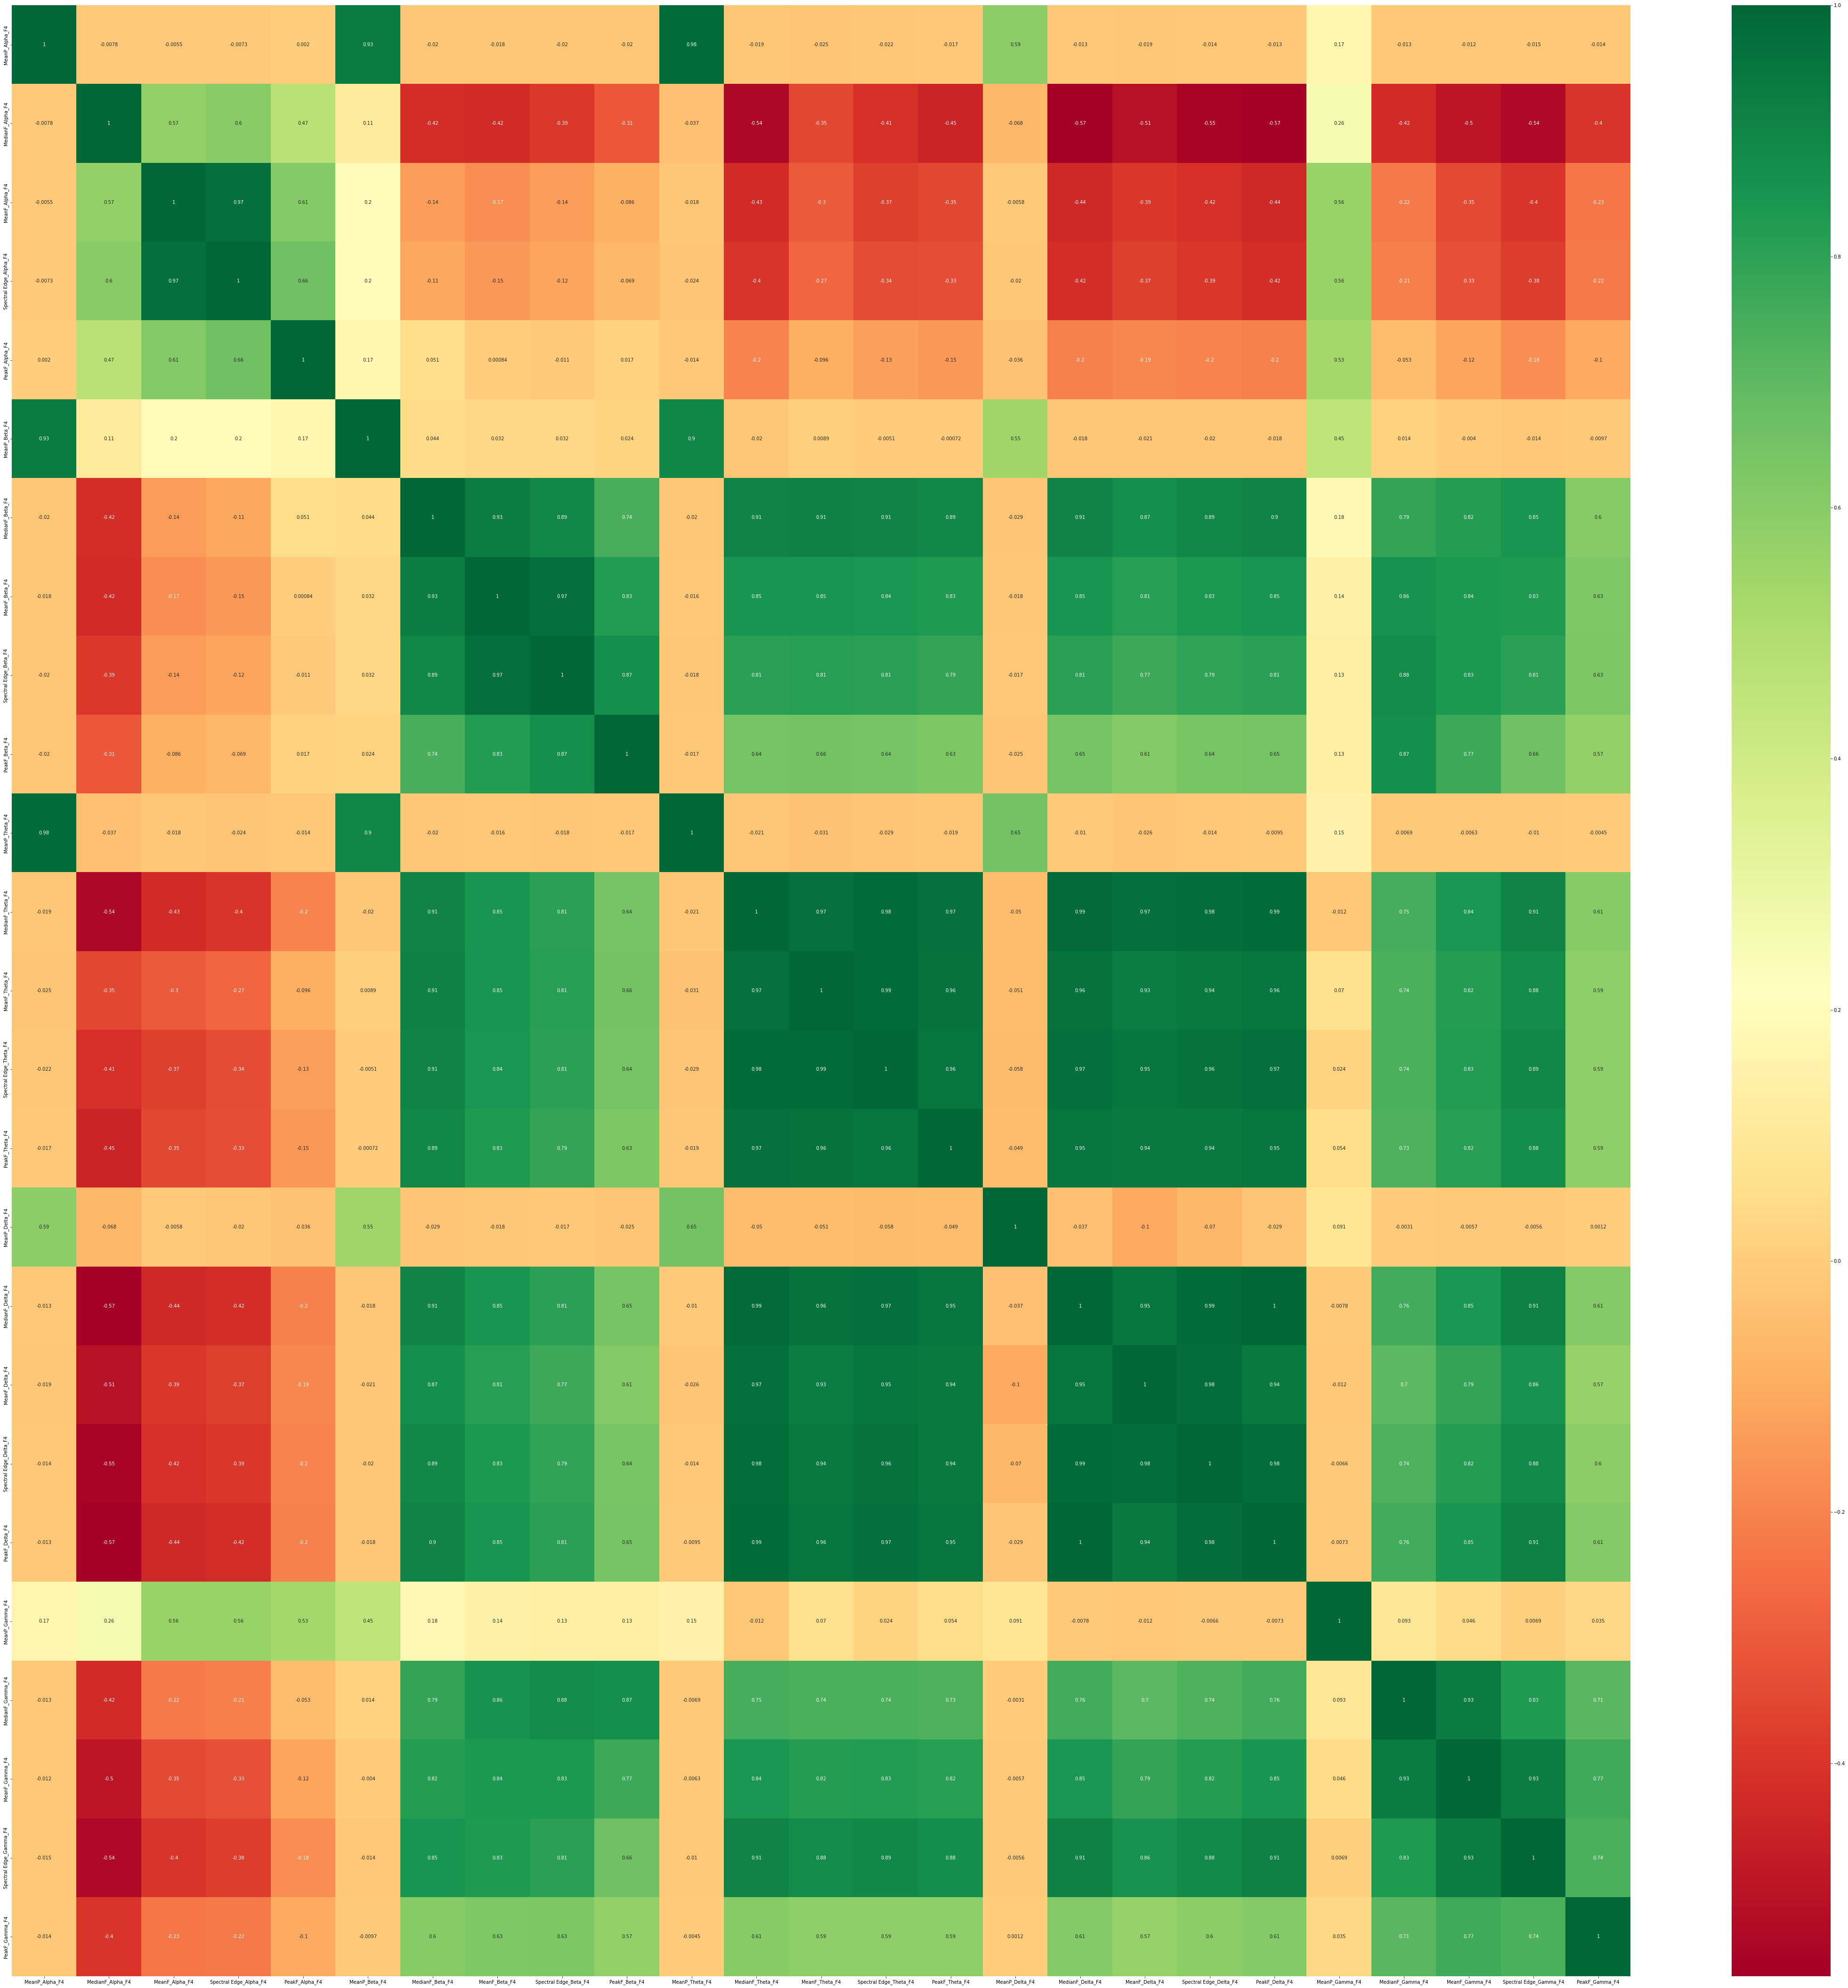

In [55]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(77,77))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

corr() is from panda and works on:
Method of correlation:

pearson : standard correlation coefficient

kendall : Kendall Tau correlation coefficient

spearman : Spearman rank correlation